Import Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Load Dataset

In [66]:
dset = pd.read_csv('Titanic.csv')

Data Preprocessing

In [67]:
print(dset.columns.values)
LE = LabelEncoder()
dset['Sex'] = LE.fit_transform(dset['Sex'])

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


<Axes: xlabel='Survived', ylabel='count'>

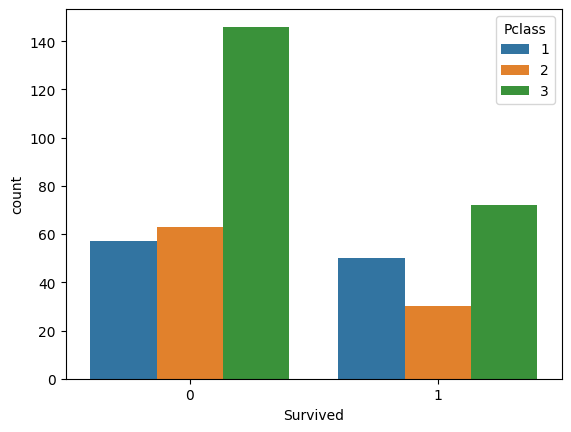

In [68]:
sns.countplot(x='Survived', hue='Pclass', data=dset)

<Axes: xlabel='Sex', ylabel='count'>

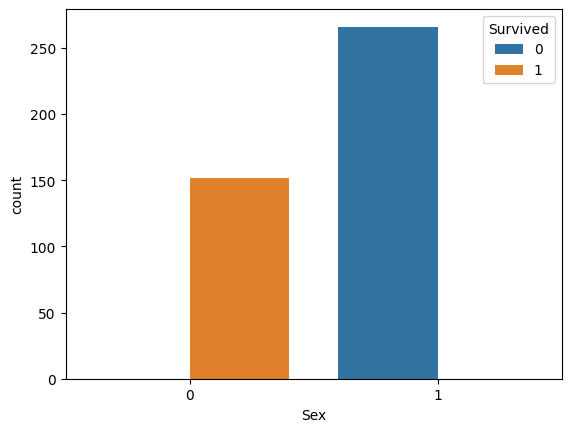

In [69]:
sns.countplot(x='Sex', hue='Survived', data=dset)

Split Data

In [70]:
x = dset[['Pclass', 'Sex']]
y = dset['Survived']

x_train, x_test, y_train, y_test = tts(x,y, test_size=0.2, random_state=2)

Train Model

In [71]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

Model Testing

In [72]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test,y_pred)

print("Accuracy : ",accuracy)
print("Model Report :")
print(report)

Accuracy :  1.0
Model Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



**Custom Testing**

      Gender (Sex):
          male   ==> 0
          Female ==> 1

      Passenger Class (Pclass):
          1st Class ==> 1
          2nd Class ==> 2
          3rd Class ==> 3

In [73]:
def data(sex,pclass):
  y_pred = model.predict([[pclass, sex]])

  return y_pred

pClass = int(input("Passenger Class : "))
gender = int(input("Gender : "))
res = data(gender,pClass)
print()

if res==0:
  print("Not Survived")
else:
  print("Survived")

  print()


Survived



C:\Users\Praveen Siva 77\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
